# Space weather domain, critical risk indicator (CRI) creation and analysis, and integrating domains

The purpose of this script is to be a guide for the interaction between data scientists and domain scientists on the [NSF PRISM](https://news.cornell.edu/stories/2020/01/cornell-co-leads-effort-use-big-data-combat-catastrophes) team and for different domains to understand one another. The objective is to **foster creation of the necessary PRISM project and collaborative infrastructure**.

This is accomplished through a 'playground' to explore new techniques to emerge Critical Risk Indicators (CRIs) and to rapidly apply data science techniques that are discussed and that emerge over the project lifetime. 

This script uses the space weather domain as the context and provides rich descriptive and metadata as an 'experiment' and use case with which domain and data scientists on the team can interact. 

New development can be posed and explored as 'experiments', thereby creating a foundation for integrating different domains.



### Rules of usage


1. Document all development
    - All code and progress in this script must be *usable* to anyone that picks it up
2. Crystallize knowledge after each development 
    - Attempt to define lessons learned and to share those in a way that will allow others to pick up where you left off
3. *Extend this list as new rules emerge*

### Space Weather Domain



##### The Sun

![The Sun](figures/sun.png)

The vastness of space is not empty - it's actually a place with *weather* and this weather comes from the fact that we live with a star...the sun. 

The sun creates everything we need to sustain life, and our living arrangement produces some of the most stunningly beautiful displays in the solar system 

![the aurora](figures/aurora.png)



In [35]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="figures/SDOmovie.mp4" type="video/mp4">
</video></div>


The sun is a spinning ball of is a spinning ball of enormous power … and is always changing. We see short, quick bursts of activity. Regions of activity appearing and disappearing. Hard to believe this is the shining ball we see everyday, isn’t it?

So, how does the sun create weather in space? To answer that I just want to freeze and zoom in on a picture from this movie


The sun creates everything we need to sustain life, and our living arrangement produces some of the most stunningly beautiful displays in the solar system 

![flare](figures/flare.png)



In [36]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="figures/CMEerupting.mp4" type="video/mp4">
</video></div>

Coronal mass ejections are really like clouds of material that blow up off of the sun and throw a magnetic shockwave into space. If Earth is in the way, there is a spectacular clash of forces.

The cloud rams the sphere around us created by our magnetic field. When it does, our magnetic field changes and the energy that get’s inside is dumped into our atmosphere. This is where the northern lights come from,
but also, because of our technologically-dependent, space-faring lifestyle, much more is at stake.

THIS is space weather.


Now that we’ve seen that space weather is caused by how our roommate,
the sun, changes - **How do we study this important, expansive system?**




![observational fleet](figures/HeliophysicsObservationalFleet.png)
*reference: https://science.nasa.gov/heliophysics*

We now have instruments on Earth and in space that study every part of our interaction with the Sun 24/7 - *the Space Weather Observational Fleet*.

Let's take a look through the various 'sub-systems' from the data perspective...




### Space Weather Data



To do this work we will work with data from across the [Heliophysics Observational System](https://smd-prod.s3.amazonaws.com/science-red/s3fs-public/atoms/files/FLEETS_WIDE_Helio_2018_TAGGED.pdf "Heliophysics Observational System"), including from the sun, solar wind, geospace (the magnetosphere, the Earth's upper atmosphere, and ground-based data that sense phenomena in the Earth's space environment or tangible effects on the Earth). A description of each regime and the corresponding data follows: 

##### Solar data



![observational fleet - solar](figures/HOF_solar.png)

1. [The Solar Dynamics Observatory (SDO), 2010 - present](https://sdo.gsfc.nasa.gov/) 
    - Two primary goals:
        - Understand how the Sun's magnetic field is generated and structured
        - Understand how this stored magnetic energy is converted and released into the heliosphere and geospace in the form of solar wind, energetic particles, and variations in the solar irradiance.
    - Quantifies the solar atmosphere on small scales of space and time and in many wavelengths simultaneously
    - 70,000 full solar images/day
    - ~2.9 petabytes between 2010-2015
        
![SDO filters](figures/SDO_filters.jpg)
    
    
    
    
2. [Solar and Heliospheric Observatory (SOHO), 1995 - present](https://sohowww.nascom.nasa.gov/home.html):
    - Three primary goals:
        - What is the structure and dynamics of the solar interior?
        - Why does the solar corona exist and how is it heated to the extremely high temperature?
        - Where is the solar wind produced and how is it accelerated?
    - [Many instruments and observations](https://sohowww.nascom.nasa.gov/about/docs/SOHO_Fact_Sheet.pdf)
        - LASCO Coronograph particularly important - shows eruptions of flares and CMEs
        
![SOHO LASCO](figures/SOHO_LASCO_coronograph.jpg)
    
*many other forms of observation*

##### Solar Wind data

    


![observational fleet - solar wind](figures/HOF_solarwind.png)

1. [Advanced Composition Explorer (ACE), 1997 - present](https://science.nasa.gov/missions/ace):
    - Observes particles of solar, interplanetary, interstellar, and galactic origins, spanning the energy range from solar wind ions to galactic cosmic ray nuclei
    - Earth is constantly bombarded by energetic particles and plasma that give rise to near-Earth space activity (e.g., space weather)
    


    

##### Geospace data
     




![observational fleet - geospace](figures/HOF_geospace.png)



Geospace contains three general subsystems:

1. The Magnetosphere
    - Region surrounding the Earth created by our magnetic field
    - Encompasses the radiation belts which represent the radiation environment that threatens humans on Earth and in space and our space assets
    - Notable missions and data: [Magnetospheric Multiscale mission](https://science.nasa.gov/missions/mms), [Time History of Events and Macroscale Interactions during Substorms](https://science.nasa.gov/missions/themis), [Van Allen Probes](https://science.nasa.gov/missions/van-allen-probes). 
2. The Ionosphere (charged portion of the Earth's upper atmosphere (100-1000 km))
    - Is the location of disruptions to Global Navigation Satellite Systems (GNSS) signals (e.g., GPS)
    - Gives rise to currents that induce currents in long conductors on the Earth's surface such as the electric power grid
    - Notable missions and data: [Total Electron Content inferred from GNSS signals - International GNSS Service](http://www.igs.org/products), [Defense Meteorological Satellite Program (DMSP)](https://www.ngdc.noaa.gov/stp/satellite/dmsp/), [Swarm](https://earth.esa.int/web/guest/missions/esa-operational-eo-missions/swarm)
3. The Thermosphere (neutral portion of the Earth's upper atmosphere (100-1000 km))
    - Causes drag to objects in space (the primary uncertainty in tracking these objects and monitoring our space assets)
    - Notable missions and data: [Challenging Minisatellite Payload (CHAMP)](https://directory.eoportal.org/web/eoportal/satellite-missions/c-missions/champ), [Gravityt Recovery and Climate Experiment](https://www.nasa.gov/mission_pages/Grace/index.html). 


#### Compiled solar wind and geospace data:
- Data Access: [NASA's Coordinated Data Analysis Web (CDAWeb)](https://cdaweb.sci.gsfc.nasa.gov/)
- Data Description: [Description of the data](https://cdaweb.gsfc.nasa.gov/pub/data/omni/high_res_omni/00readme)
- Data Format: [Data format (high-resolution data)](https://cdaweb.gsfc.nasa.gov/pub/data/omni/high_res_omni/hroformat.txt)

### Existing space weather critical risk indicators




**What does 'critical risk indication' mean in the space weather domain?** A few potential definitions:
1. Specification of periods when the Sun is particularly active (proxies: sunspot number, location in the 11-year solar cycle)
2. Identification of 'geomagnetically effective' periods in solar wind data (important parameters: magnetic field, particularly the north-south component, velocity, density)
3. Extent of the coupling between the solar wind and the magnetosphere (proxies: [the Borovsky coupling function](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/jgra.50557), [the Newell coupling function](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2006JA012015))
4. Activity of the current systems in the Earth's upper atmosphere (proxies: [the disturbance storm time index (DST)](https://www.ngdc.noaa.gov/stp/geomag/dst.html), [the auroral electrojet index (AE)](https://www.ngdc.noaa.gov/stp/geomag/ae.html), [the planetary k-index (Kp)](https://www.swpc.noaa.gov/products/planetary-k-index)



Below we will explore existing space weather CRIs through a sample set of data from May 13, 2019. 

This date was chosen because we have available geomagnetically induced current (GIC) data directly from the Tennessee Valley Authority (TVA) utility that we can align with the solar wind data. The specific ground-station that recorded the GIC data is called 'SB_Snowdown' and the data were collected as part of the Electric Power Reliability Corporation (EPRI) SUNBURST program. 

Much more data are available. 



#### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import inspect
import sys
import os
import datetime

import itertools
import random
import glob
import time

import matplotlib.pyplot as plt



#### Utility functions

#### Data analysis

##### Analysis below is conducted with updated GIC data

In [72]:
# Updated May 20, 2020 (RMM)
data_directory = '/Users/ryanmcgranaghan/Documents/NSF_CHESS/data/FTP/'
data_file = '20180301-Weakley-gic.csv'

df = pd.read_csv(os.path.join(data_directory,data_file))

# Set and convert the index to datetime format
df['datetimes'] = [datetime.datetime(df['year'][d],df['month'][d],df['day'][d],df['hour'][d],df['minute'][d],df['second'][d]) for d in range(len(df))]

df = df.set_index(['datetimes'])
df.index = pd.to_datetime(df.index)
df = df.drop(['year','month','day','hour','minute','second'],axis=1)

# Read in SuperMAG indices and data
data_file_supermag = '2018_sm_global.csv'
df_supermag = pd.read_csv(os.path.join(data_directory,data_file_supermag))
df_supermag = df_supermag.rename(columns={"Date_UTC": "datetimes"})
df_supermag = df_supermag.set_index(['datetimes'])
df_supermag.index = pd.to_datetime(df_supermag.index)
df_supermag = df_supermag.reindex(df.index,method='ffill')

#TODO Merge the dataframes



df_combined = df.merge(df_supermag_chc,left_index=True,right_on='datetimes')#='datetimes')
df_combined

# Replace missing data with NaNs
df_combined[np.abs(df_combined) > 9999.] = np.nan

# # Drop duplicate columns - keeping the SuperMAG data
# df_combined = df_combined.drop(['clock','Bz','By','Bx','Vsw','Psw'])

In [113]:
np.sqrt(df_combined['Vsw'].values)

array([20.27616828, 20.27607457, 20.27598086, ..., 18.84338876,
       18.843563  , 18.84373724])

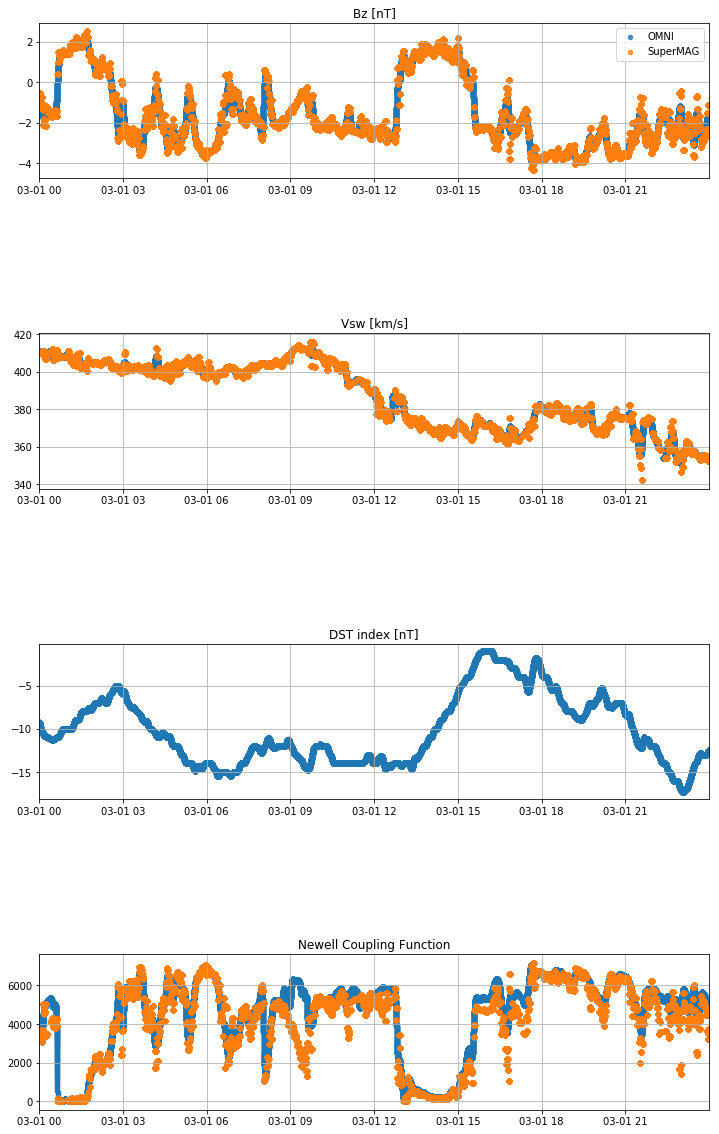

In [115]:


# Visualize the data
plt.figure(figsize=(12,20))
plt.subplot(411)
plt.scatter(df_combined.index,df_combined['Bz'],s=20,alpha=0.8,label='OMNI')
plt.scatter(df_combined.index,df_combined['GSM_Bz'],s=20,alpha=0.8,label='SuperMAG')
plt.title('Bz [nT]');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)
plt.legend()

plt.subplot(412)
ax = plt.gca
plt.scatter(df_combined.index,df_combined['Vsw'],s=20,alpha=0.8,label='OMNI')
plt.scatter(df_combined.index,df_combined['GSE_Vx'],s=20,alpha=0.8,label='SuperMAG')
plt.title('Vsw [km/s]');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)

plt.subplot(413)
ax = plt.gca
plt.scatter(df_combined.index,df_combined['SymH'],s=20,alpha=0.8)
plt.title('DST index [nT]');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)

plt.subplot(414)
ax = plt.gca
plt.scatter(df_combined.index,df_combined['newell'],s=20,alpha=0.8,label='OMNI')
plt.scatter(df_combined.index,df_combined['NEWELL'],s=20,alpha=0.8,label='SuperMAG')
plt.title('Newell Coupling Function');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)

plt.subplots_adjust(hspace=1)
plt.show()

/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


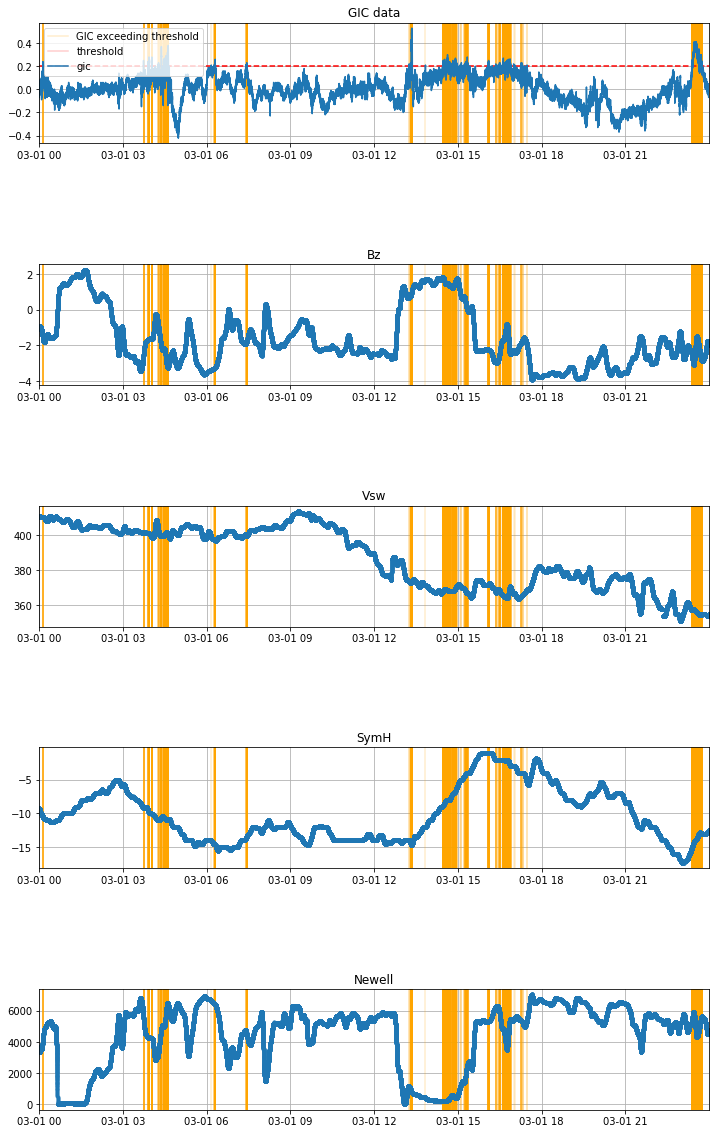

In [114]:
# Re-visualize the data with periods of heightened GIC values highlighted, 
#    exposing the relationships between various space weather indicators and power grid effects

threshold = 0.2

idx_GIC = np.argwhere( (df_combined['gic']>threshold) )

plt.figure(figsize=(12,20))
plt.subplot(511)
ax = plt.gca
# Set proxy legend labels
plt.plot([], label='GIC exceeding threshold', color="orange", alpha=0.2)  
plt.plot([], label='threshold', color="r", alpha=0.2)
for i in range(len(idx_GIC)):
    plt.axvline(x=df_combined.index.values[idx_GIC[i][0]],
                color='orange',
                alpha = 0.2,)
plt.axhline(y=threshold,
            linestyle='--',
            color='r',)
plt.plot(df_combined.index,
         df_combined['gic'],)
# plt.fill_between(df_combined[df_combined['gic']>threshold].index.values,
#                  np.tile(-1,len(df_combined[df_combined['gic']>threshold])),
#                  np.tile(2,len(df_combined[df_combined['gic']>threshold])),
#                  facecolor="orange", # The fill color
#                  alpha=0.2)

plt.title('GIC data')
plt.legend()
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)

plt.subplot(512)
ax = plt.gca
for i in range(len(idx_GIC)):
    plt.axvline(x=df_combined.index.values[idx_GIC[i][0]],
                color='orange',
                alpha = 0.2,
                label = 'GIC exceeding threshold')
plt.plot(df_combined.index,df_combined['Bz'],'.',alpha=0.8)
plt.title('Bz');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)

plt.subplot(513)
ax = plt.gca
for i in range(len(idx_GIC)):
    plt.axvline(x=df_combined.index.values[idx_GIC[i][0]],
                color='orange',
                alpha = 0.2)
plt.plot(df_combined.index,df_combined['Vsw'],'.',alpha=0.8)
plt.title('Vsw');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)

plt.subplot(514)
ax = plt.gca
for i in range(len(idx_GIC)):
    plt.axvline(x=df_combined.index.values[idx_GIC[i][0]],
                color='orange',
                alpha = 0.2)
plt.plot(df_combined.index,df_combined['SymH'],'.',alpha=0.8)
plt.title('SymH');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)

plt.subplot(515)
ax = plt.gca
for i in range(len(idx_GIC)):
    plt.axvline(x=df_combined.index.values[idx_GIC[i][0]],
                color='orange',
                alpha = 0.2)
plt.plot(df_combined.index,df_combined['newell'],'.',alpha=0.8)
plt.title('Newell');
plt.xlim(df_combined.index[0],df_combined.index[-1])
plt.grid(True)


plt.subplots_adjust(hspace=1)
plt.show()



##### Analysis below is conducted with old GIC data

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


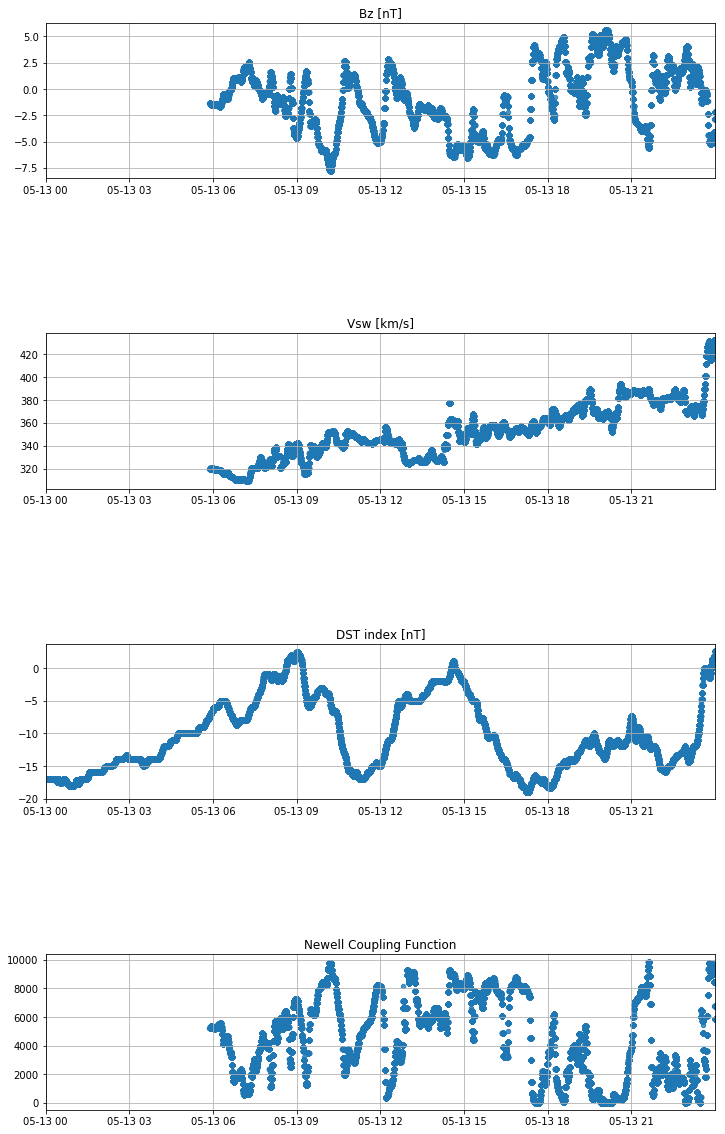

In [34]:
# Read in and plot the solar wind and geospace data
data_directory = '/Users/ryanmcgranaghan/Documents/NSF_PRISM/data/'
data_file = 'SUNBURST_Snowdoun_SolarWind_May13_2019_omni.csv'

df = pd.read_csv(os.path.join(data_directory,data_file))

# Set and convert the index to datetime format
df = df.set_index(['Date_UTC'])
df.index = pd.to_datetime(df.index)

# Replace missing data with NaNs
df[df < -99999.] = np.nan


# Visualize the data
plt.figure(figsize=(12,20))
plt.subplot(411)
plt.scatter(df.index,df['Bz'],s=20,alpha=0.8)
plt.title('Bz [nT]');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)

plt.subplot(412)
ax = plt.gca
plt.scatter(df.index,df['Vsw'],s=20,alpha=0.8)
plt.title('Vsw [km/s]');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)

plt.subplot(413)
ax = plt.gca
plt.scatter(df.index,df['SymH'],s=20,alpha=0.8)
plt.title('DST index [nT]');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)

plt.subplot(414)
ax = plt.gca
plt.scatter(df.index,df['newell'],s=20,alpha=0.8)
plt.title('Newell Coupling Function');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)


plt.subplots_adjust(hspace=1)
plt.show()



/anaconda3/envs/python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


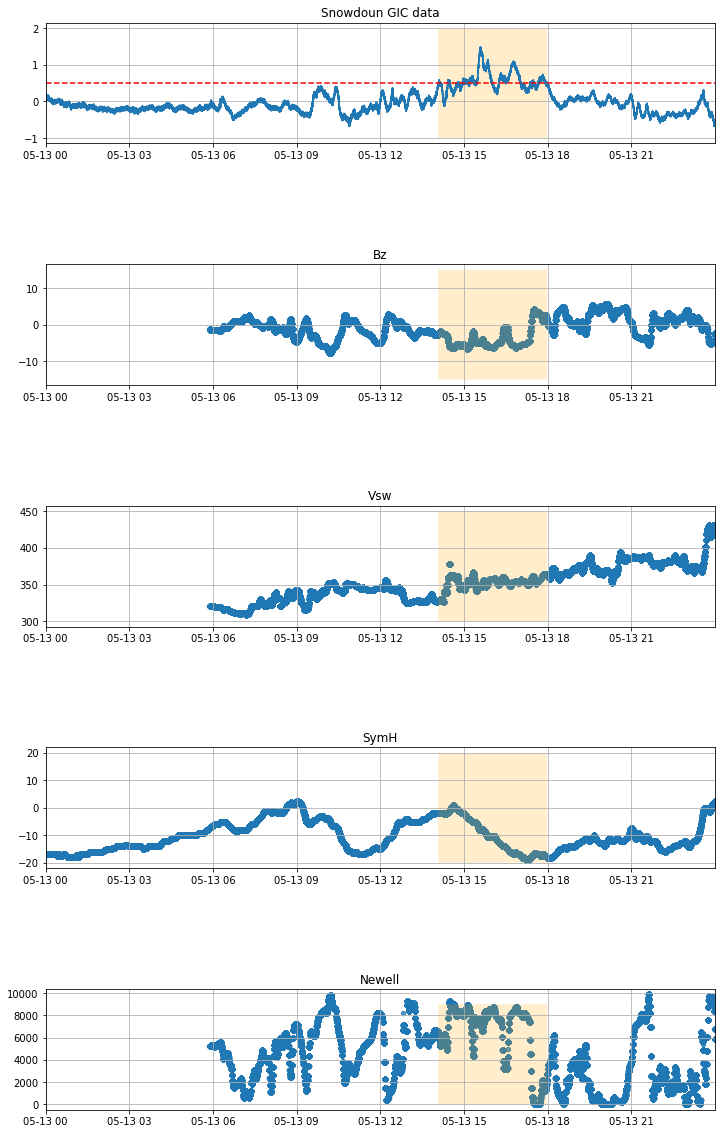

In [35]:
# Re-visualize the data with periods of heightened GIC values highlighted, 
#    exposing the relationships between various space weather indicators and power grid effects


idx_GIC = np.argwhere( (df['SB_snowdoun']>0.5) )

plt.figure(figsize=(12,20))
plt.subplot(511)
ax = plt.gca
plt.plot(df.index,df['SB_snowdoun'])
plt.fill_between(df[df['SB_snowdoun']>0.5].index.values,
                 np.tile(-1,len(df[df['SB_snowdoun']>0.5])),
                 np.tile(2,len(df[df['SB_snowdoun']>0.5])),
                 facecolor="orange", # The fill color
                 alpha=0.2)
plt.axhline(y=0.5,linestyle='--',color='r')
plt.title('Snowdoun GIC data');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)

plt.subplot(512)
ax = plt.gca
plt.scatter(df.index,df['Bz'],s=20,alpha=0.8)
plt.fill_between(df[df['SB_snowdoun']>0.5].index.values,
                 np.tile(-15,len(df[df['SB_snowdoun']>0.5])),
                 np.tile(15,len(df[df['SB_snowdoun']>0.5])),
                 facecolor="orange", # The fill color
                 alpha=0.2)
plt.title('Bz');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)

plt.subplot(513)
ax = plt.gca
plt.scatter(df.index,df['Vsw'],s=20,alpha=0.8)
plt.fill_between(df[df['SB_snowdoun']>0.5].index.values,
                 np.tile(300,len(df[df['SB_snowdoun']>0.5])),
                 np.tile(450,len(df[df['SB_snowdoun']>0.5])),
                 facecolor="orange", # The fill color
                 alpha=0.2)
plt.title('Vsw');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)

plt.subplot(514)
ax = plt.gca
plt.scatter(df.index,df['SymH'],s=20,alpha=0.8)
plt.fill_between(df[df['SB_snowdoun']>0.5].index.values,
                 np.tile(-20,len(df[df['SB_snowdoun']>0.5])),
                 np.tile(20,len(df[df['SB_snowdoun']>0.5])),
                 facecolor="orange", # The fill color
                 alpha=0.2)
plt.title('SymH');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)

plt.subplot(515)
ax = plt.gca
plt.scatter(df.index,df['newell'],s=20,alpha=0.8)
plt.fill_between(df[df['SB_snowdoun']>0.5].index.values,
                 np.tile(0,len(df[df['SB_snowdoun']>0.5])),
                 np.tile(9000,len(df[df['SB_snowdoun']>0.5])),
                 facecolor="orange", # The fill color
                 alpha=0.2)
plt.title('Newell');
plt.xlim(df.index[0],df.index[-1])
plt.grid(True)


plt.subplots_adjust(hspace=1)
plt.show()



### Opportunities to develop new CRIs



Utilize machine learning approaches:
- [https://en.wikipedia.org/wiki/Support-vector_machine](Support Vector Machines (SVM)) can provide classification that synthesizes space weather data, thereby making the model a CRI itself. The classification can be applied for any desired variable (an existing CRI or an observable that we care about, like geomgnetically induced currents). 
    - [McGranaghan et al., 2018](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2018SW002018) demonstrated these methods for space weather.
    - Lan's group has produced [new SVM capabilities for high dimensional data](http://users.stat.umn.edu/~wangx346/research/SVM_selection.pdf) that are a natural place to start data science-domain science interactions
    
Most promising areas for application of ML in space weather
- Transfer learning: Periods of high space weather activity are infrequent, making high activity periods a minority class in our data. Therefore, any techniques dealing with class imbalance or data sparsity are critical. Transfer learning and concepts like [learning to model the tail](https://papers.nips.cc/paper/7278-learning-to-model-the-tail) have the potential to create immense impact.
- Methods to combine image and time series data: To predict space weather, solar information must be combined with solar wind and geospace data. The majority of data about the sun exist in images, whereas the solar wind and geospace observational data are primarily time series. Methods to integrate these data sources, obtaining the important information from each in an appropriately balanced manner is a pressing challenge. 
    

### Example of developing new CRIs - Space Weather-Data Science Collaboration


Steps: 
1. Information exchange: discussion to develop a common terminology. Exchange of published papers (which is the usual first thought), while helpful, is not the most valuable approach to develop a common language. More value is obtained from *usable* tools and demonstrations of the data (like this notebook). 
2. Match methods to data set characteristics. 
    - We identified Dynamic Linear/Shrinkage Models as a promising first approach
3. Domain scientist provides a curated set of 'playground' data
4. Data scientist performs quick analysis and returns in the form of a Jupyter notebook (or other interactive product)
5. Iterate the exchange with regular, quick-feedback cadence (one week or less)


Example interaction across PRISM team for Space Weather

[Cornell Data Science Outcomes for GIC analysis -- iteration #3](./DLM_for_GICs_Cornell_Iteration3_Results.html)

Significant outcomes: 
1. Two modes of GIC data identified: white noise and significant volatility
2. Many of the predictors of the GIC behavior are not significant independently, though relationships found with data-driven approach that are known in space weather commmunity, add credence to the ability of this approach to identify physically-meaningful information/discovery.
3. Some stations act as strong predictors of other stations' behavior. Station-to-station relationships warrant further, dynamic, investigation


### Using space weather as a springboard for integrating domains - areas ripe for study



1. Connection to the power grid
    - Ongoing work with the [NSF Convergence Hub for the Exploration of Space Science (CHESS) team](https://www.nsf.gov/od/oia/convergence-accelerator/Award%20Listings/Track%20A%20Abstracts/A-7152-McGranaghan-ASTRA.pdf) naturally aligns to PRISM and provides a foundation for the space weather-power grid use case
    - [Space weather creates tangible, observable impacts on the power grid](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016SW001537) and is a critical and pressing risk
    
2. Connection to the financial sector
    - [A case study of the socioeconomic impact of space weather](https://onlinelibrary.wiley.com/doi/full/10.1111/risa.13229) that reveals how to take a risk approach to the threat. 
    - *Space Weather data share many similarities to financial sector data - long time series with 'anomalous' events infrequent throughout, but are those periods that are of most interest*
    
3. Connection to Earth Science (terrestrial weather + climate)
    - Exciting area to emerge new connections - there have been many studies of potential connections between, e.g., climate and solar irradiance; coupling between upper and terrestrial atmospheres
    - Area of high potential impact for PRISM and requires more investigation
    

### Calls to action

    
    


1. Play around with this script -- i.e., ***ignite*** domain integration and systemic risk indicator creation
    - **Spend 15 minutes with this script to explore the portion that most directly relates to your field and suggest opportunities for cross-domain data exploration**
    - Apply new machine learning and network analysis approaches to space weather data. Can these new techniques better provide information for e.g., the power grid? 
    - Bring in new data from other domains
    
    


2. Learn more...
    - The importance and reach of space weather - *what you need to know*: [Schrijver et al., 2015](https://www.sciencedirect.com/science/article/pii/S0273117715002252)
    - Application of Support Vector Machines to create Space Weather CRIs: [McGranaghan et al., 2018](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2018SW002018)
    - Network analyses applied in the space weather domain:
        - [Dods et al., 2015](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2015JA021456)
        - [McGranaghan et al., 2017](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017JA024202)
    - Space weather and economic risk: [Eastwood et al., 2017](https://onlinelibrary.wiley.com/doi/full/10.1111/risa.12765)
    - Space weather and climate: [Space Weather Prediction Center thoughts](https://www.swpc.noaa.gov/impacts/space-weather-impacts-climate)
    

In [3]:
df

,SB_snowdoun,Bz,By,Bx,AE,SymH,Vsw,Dsw,Psw,newell
Date_UTC,,,,,,,,,,
2019-05-13 00:00:00,0.02,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:01,0.03,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:02,0.03,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:03,0.06,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:04,0.02,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:05,0.02,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:06,0.04,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:07,0.04,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
2019-05-13 00:00:08,0.04,NaN,NaN,NaN,NaN,-17.0,NaN,NaN,NaN,NaN
